### Análise do Campeonato Brasileiro

#### Objetivo

Esse projeto tem a finalidade de exibir alguns insights relacionadas ao principal campeonato brasileiro de futebol do Brasil, que é realizado no formato de pontos corridos desde 2003.

#### Período

Base de dados compreende o período de 2003 até 2020.

#### Fonte de Dados

https://github.com/adaoduque/Brasileirao_Dataset

### Extração dos Dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importando base de dados

df_full = pd.read_csv(r'datasets/campeonato-brasileiro-full.csv')
df_cartoes = pd.read_csv(r'datasets/campeonato-brasileiro-cartoes.csv')
df_esta = pd.read_csv(r'datasets/campeonato-brasileiro-estatisticas-full.csv')
df_gols = pd.read_csv(r'datasets/campeonato-brasileiro-gols.csv')

### Tratamento dos Dados

In [3]:
# ajustando formato da data

df_full.data = pd.to_datetime(df_full.data)

In [4]:
# incluindo uma coluna de ano

df_full['ano'] = df_full['data'].dt.strftime('%Y')

In [5]:
# incluindo um coluna com o nome do dia

df_full['dia_semana'] = df_full['data'].dt.day_name()

In [6]:
# ajustando base de dados para textos minusculos

df_full.columns = df_full.columns.str.lower()
df_gols.columns = df_gols.columns.str.lower()
df_cartoes.columns = df_cartoes.columns.str.lower()
df_esta.columns = df_esta.columns.str.lower()

### Análise dos Dados

Análise exploratória dos dados.


In [7]:
# Quantos gols foram feitos no total?

df_full['total_gols'] = df_full['mandante_placar'] + df_full['visitante_placar']
df_full['total_gols'].sum()

20640

In [8]:
# Qual a média de gols por partida?

df_full['total_gols'].mean()

2.57196261682243

In [9]:
### Quais são os 5 times que mais sofreram gols?

gols_mandante  = df_full.groupby('visitante')['mandante_placar' ].sum().sort_values(ascending=False).reset_index()
gols_mandante.rename(columns  = {"visitante": "time", 'mandante_placar' : 'gols_sofridos' }, inplace=True)
 
gols_visitante = df_full.groupby('mandante' )['visitante_placar'].sum().sort_values(ascending=False).reset_index()
gols_visitante.rename(columns = {"mandante" : "time", 'visitante_placar': 'gols_sofridos' }, inplace=True)
 
gols_time = pd.concat([gols_mandante, gols_visitante])
 
gols_sofridos = gols_time.groupby('time')['gols_sofridos'].sum().sort_values(ascending=False).reset_index()
gols_sofridos.head(5)

,time,gols_sofridos
0,Fluminense,985
1,Atletico-MG,946
2,Athletico-PR,922
3,Flamengo,920
4,Santos,918


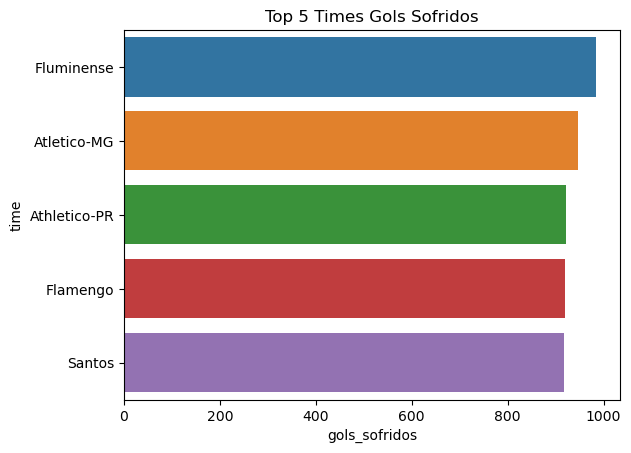

In [10]:
### Gráfico top 5 times gols sofridos

sns.barplot(x="gols_sofridos", y="time", data=gols_sofridos.head(5))
plt.title('Top 5 Times Gols Sofridos')
plt.show()

In [11]:
### Quais são os 5 times que mais marcaram gols?

gols_mandante  = df_full.groupby('mandante' )['mandante_placar' ].sum().sort_values(ascending=False).reset_index()
gols_mandante.rename(columns  = {"mandante" : "time", 'mandante_placar' : 'gols_marcados' }, inplace=True)
 
gols_visitante = df_full.groupby('visitante')['visitante_placar'].sum().sort_values(ascending=False).reset_index()
gols_visitante.rename(columns = {"visitante": "time", 'visitante_placar': 'gols_marcados' }, inplace=True)
 
gols_time = pd.concat([gols_mandante, gols_visitante])
 
gols_marcados = gols_time.groupby('time')['gols_marcados'].sum().sort_values(ascending=False).reset_index()
gols_marcados.head(5)

,time,gols_marcados
0,Santos,1139
1,Sao Paulo,1123
2,Flamengo,1113
3,Atletico-MG,1079
4,Fluminense,1047


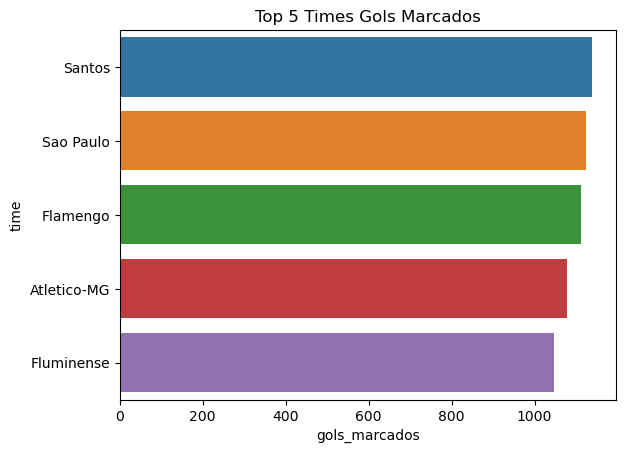

In [12]:
### Gráfico top 5 times gols marcados

sns.barplot(x="gols_marcados", y="time", data=gols_marcados.head(5))
plt.title('Top 5 Times Gols Marcados')
plt.show()

In [13]:
# Qual é o total de faltas, impedimentos e escanteios?

soma_faltas = df_esta['faltas'].sum()
soma_impedimentos = df_esta['impedimentos'].sum()
soma_escanteios = df_esta['escanteios'].sum()
print('\n Total Faltas: {} \n Total Impedimentos: {} \n Total Escanteios: {}'.format(soma_faltas, soma_impedimentos, soma_escanteios))


 Total Faltas: 91127 
 Total Impedimentos: 9843 
 Total Escanteios: 31730


In [14]:
# Quantos gols contra foram marcados?

df_gols['tipo_de_gol'] = df_gols['tipo_de_gol'].str.lower()
df_gols[df_gols['tipo_de_gol'] == 'gol contra']['tipo_de_gol'].value_counts().head(1)

gol contra    207
Name: tipo_de_gol, dtype: int64

In [15]:
# Qual jogador recebeu mais cartões vermelhos?

df_cartoes['cartao'] = df_cartoes['cartao'].str.lower()
df_cartoes[df_cartoes['cartao'] != 'vermelho']['atleta'].value_counts().head(1)

Thiago Heleno    61
Name: atleta, dtype: int64

In [16]:
# Qual é o jogador artilheiro?

artilheiro = df_gols.groupby('atleta')
artilheiro['atleta'].count().sort_values(ascending=False).head(1)

atleta
Gabriel Barbosa    92
Name: atleta, dtype: int64

In [17]:
# Qual o dia da semana que mais teve jogos?

df_full['dia_semana'].value_counts().head(1)

Sunday    2809
Name: dia_semana, dtype: int64

In [18]:
# Qual o horário que mais teve jogos?

df_full['hora'].value_counts().head(1)

16:00    1837
Name: hora, dtype: int64

In [19]:
# Qual foi o jogo da linha 1150?

df_full.loc[1150][['mandante', 'visitante', 'data', 'vencedor']]

mandante              Fluminense
visitante               Coritiba
data         2005-05-21 00:00:00
vencedor                Coritiba
Name: 1150, dtype: object

In [20]:
# Qual o time mandante com mais empates?

df_full[df_full['vencedor'] == '-']['mandante'].value_counts().head(1)

Sao Paulo    108
Name: mandante, dtype: int64

In [21]:
# Qual o time visitante com mais derrotas?

df_full[df_full['visitante'] != df_full['vencedor']]['visitante'].value_counts().head(1)

Athletico-PR    287
Name: visitante, dtype: int64

In [22]:
# Time com maior número de gols como mandante?

gols_mandante = df_full.groupby('mandante')
gols_mandante['mandante_placar'].sum().sort_values(ascending=False).head(1)

mandante
Santos    702
Name: mandante_placar, dtype: int64

In [23]:
# Qual time que mais empatou como mandante no ano de 2010?

df_full[(df_full['vencedor'] == '-') & (df_full['ano'] == '2010')]['mandante'].value_counts().head(1)

Botafogo-RJ    10
Name: mandante, dtype: int64